In [9]:
import pandas as pd
import numpy as np

import sympy
from sympy import ordered, Matrix, hessian, Trace
# from sympy.vector import laplacian, divergence, gradient, curl, CoordSys3D, Del
from sympy.plotting import plot3d

import matplotlib.pyplot as plt

In [10]:
## 2D Gaussian Distribution Test
fstr = "(1/(2*pi*1**2))*exp(-(x**2+y**2)/(2*1**2))"
x_min =-3
x_max=3
y_min=-3
y_max=3
resolution = 0.5
x_steps = np.arange(x_min, x_max, resolution)
y_steps = np.arange(y_min, y_max, resolution)
nx = len(x_steps)
ny = len(y_steps)

In [11]:
f = sympy.parsing.sympy_parser.parse_expr(fstr, evaluate=False)
f

1*exp((-x**2 - y**2)/((2*1**2)))/(2*pi*1**2)

In [12]:
# get our variables
# x,y = sympy.symbols('x y')
x, y = list(sympy.ordered(f.free_symbols))
x, y

(x, y)

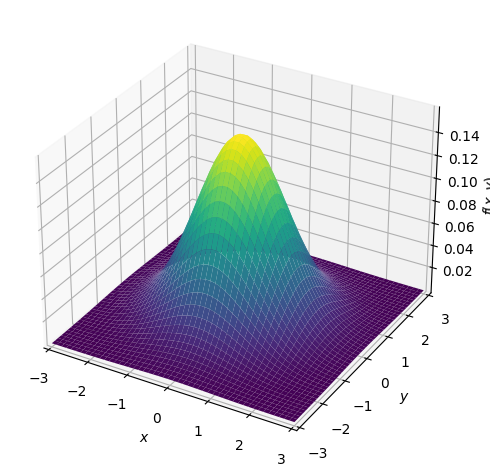

In [13]:
pcm = plot3d(f, (x, x_min, x_max), (y, y_min, y_max))

In [14]:
## Using sympy to calculate the gradient
# from sympy.vector import CoordSys3D, gradient

## 3D Gradient
# def gradient3d(f, v):
#     return (f.diff(v[0]), f.diff(v[1]))

gradient = lambda f, v: Matrix([f]).jacobian(v)

gf = gradient(f, (x,y))
gf

Matrix([[-1/(2*pi)*x*exp((-x**2 - y**2)/((2*1**2))), -1/(2*pi)*y*exp((-x**2 - y**2)/((2*1**2)))]])

Text(0.5, 1.0, 'vector field')

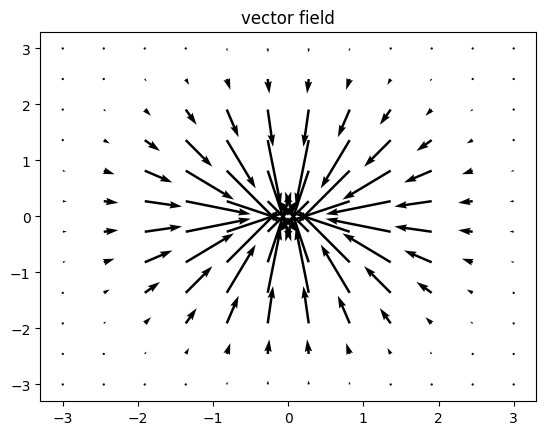

In [15]:
# convert sympy gradient to matrix for plotting
xrange = np.linspace(x_min,x_max,nx)
yrange = np.linspace(y_min,y_max,ny)
X,Y = np.meshgrid(xrange, yrange)

U=X
V=Y

# As an alternative to subs one could use lambdify from sympy.utilities
from sympy.utilities.lambdify import lambdify
f1 = lambdify([x, y], gf[0])
f2 = lambdify([x, y], gf[1])

U=[f1(x1,y1) for x1,y1 in zip(X,Y)]
V=[f2(x1,y1) for x1,y1 in zip(X,Y)]

plt.quiver(X,Y,U,V, linewidth=1)
plt.title("vector field")

https://mathworld.wolfram.com/NormalVector.html

The normal vector, $\vec{n}$,  at a point (x_0,y_0) on a surface z=f(x,y) is given by

$$
\vec{n} = \begin{bmatrix} f_x(x_0,y_0) \\ f_y(x_0,y_0) \\ -1 \end{bmatrix}, 
$$

where $f_x=\partial{f}/\partial{x}$ and $f_y=\partial{f}/\partial{y}$ are partial derivatives.

A normal vector to a plane specified by
$$
 f(x,y,z)=ax+by+cz+d=0
$$
is given by
$$
 \vec{n} = \nabla{f}=\begin{bmatrix} a \\ b \\ c \end{bmatrix}
$$
where $\nabla{f}$ denotes the gradient.

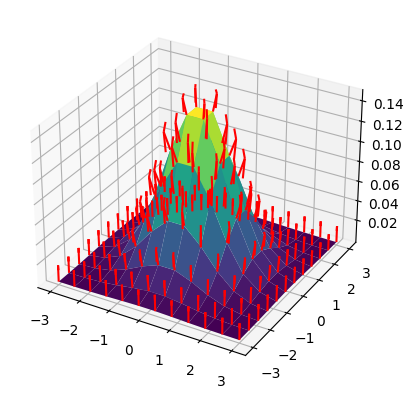

In [16]:
xrange = np.linspace(x_min,x_max,nx)
yrange = np.linspace(y_min,y_max,ny)
X,Y = np.meshgrid(xrange, yrange)

Z = np.empty(shape=(ny, nx))
U = np.empty(shape=(ny, nx))
V = np.empty(shape=(ny, nx))
W = np.empty(shape=(ny, nx))

f_x = lambdify([x, y], f.diff(x))
f_y = lambdify([x, y], f.diff(y))

scale = 2
zscale = 60
for i in range(len(xrange)):
    for j in range(len(yrange)):
        Z[j, i] = f.subs({x: xrange[i], y: yrange[j]})
        U[j, i] = -f_x(xrange[i], yrange[j])*scale
        V[j, i] = -f_y(xrange[i], yrange[j])*scale
        W[j, i] = 1/120*scale

# plt.matshow(Z)
# plt.matshow(U)
# plt.matshow(V)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
asm = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.quiver(X, Y, Z, U, V, W,color='r') # , length=0.1, normalize=True)
# ax.set_zlim3d(0, 1)

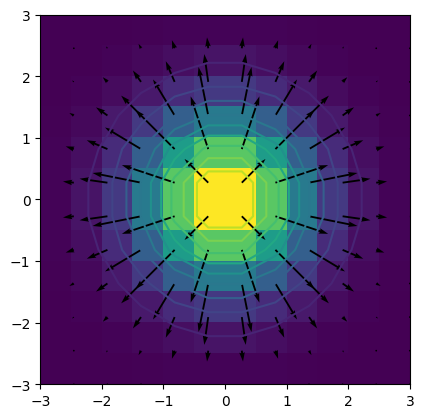

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(Z, extent=[x_min, x_max, y_min, y_max])
ax.contour(X, Y, Z, 10)
ax.quiver(X, Y, U, V, linewidth=1)

## https://www.youtube.com/watch?v=e-erMrqBd1w&t=3689s
# 37:42 - 38:00

In [18]:
from sympy import symbols, Matrix, Transpose

u, v, x, y = symbols('u v x y')

f = Matrix([sympy.cos(u), sympy.sin(u), v])
df = f.jacobian([u,v])
df
# take cross product of df with itself
N = f.diff(u).cross(f.diff(v))
N
dN = N.diff(u) + N.diff(v)
dN

# .replace(sympy.Abs, lambda e: e)) simply removes the abs() function
k_Nu = (f.diff(u).dot(N.diff(u)))/((f.diff(u).norm().replace(sympy.Abs, lambda e: e))**2)
k_Nu.simplify()
k_Nv = (f.diff(v).dot(N.diff(v)))/((f.diff(v).norm().replace(sympy.Abs, lambda e: e))**2)
k_Nv.simplify()
k_Nu, k_Nv

(1, 0)

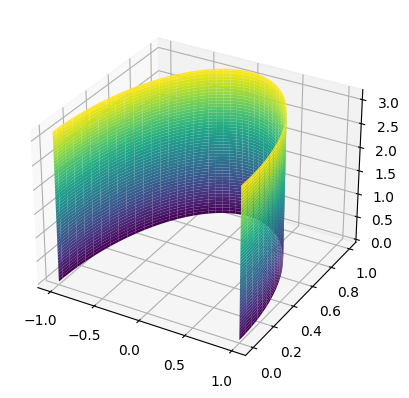

In [19]:
## Plot our parametric surface
Ur = np.linspace(0, 3.14, 100)
Vr = np.linspace(0, 3.14, 100)
U, V = np.meshgrid(Ur, Vr)
X = np.cos(U)
Y = np.sin(U)
Z = V
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
asm = ax.plot_surface(X, Y, Z, cmap='viridis')

## https://www.youtube.com/watch?v=e-erMrqBd1w&t=3689s
# 43:00

In [20]:
u, v, x, y = symbols('u v x y')

# input function
f = Matrix([sympy.cos(u), sympy.sin(u), u+v])
# derivative of f
df = f.jacobian([u,v])
# Find normal by taking cross product of df/du and df/dv
N = f.diff(u).cross(f.diff(v))
# derivative of N
dN = N.jacobian([u,v])
# Shape operator: df * S = dN
S = df.solve(dN)

X = S.eigenvects() #returns eigenvalues, eigenvects
# k = S.eigenvals().keys() #returns eigenvalues and their algebraic multiplicity
# display(S)

k1 = X[0][0] # k[0]
k2 = X[1][0] # k[1]
X1 = X[0][2][0]
X2 = X[1][2][0]
# calculate the curvature vector of the surface
k1_v = df * X1
k2_v = df * X2

print(f'k1: {k1}, k2: {k2}')
print('Curvature vectors:')
display(k1_v)
display(k2_v)
print(f'Are orthogonal: {k1_v.dot(k2_v) == 0}')

k1: 0, k2: 1
Curvature vectors:


Matrix([
[0],
[0],
[1]])

Matrix([
[ sin(u)],
[-cos(u)],
[      0]])

Are orthogonal: True


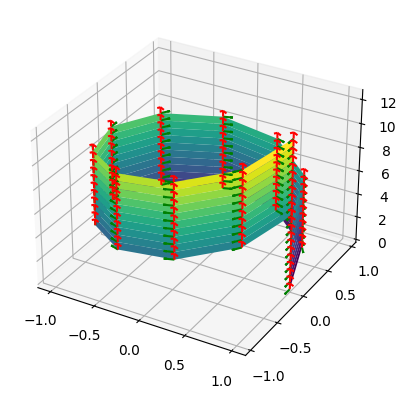

In [21]:
## Plot our parametric surface

res = 11
Ur = np.linspace(0, 2*3.14, res)
Vr = np.linspace(0, 2*3.14, res)
U, V = np.meshgrid(Ur, Vr)
X = np.cos(U)
Y = np.sin(U)
Z = U+V

U1 = np.empty(shape=(res, res))
V1 = np.empty(shape=(res, res))
W1 = np.empty(shape=(res, res))
U2 = np.empty(shape=(res, res))
V2 = np.empty(shape=(res, res))
W2 = np.empty(shape=(res, res))

scale = 1
zscale = 1
for i in range(res):
    for j in range(res):
        U1[j, i] = k1_v[0].subs({u: Ur[i], v: Vr[j]})
        V1[j, i] = k1_v[1].subs({u: Ur[i], v: Vr[j]})
        W1[j, i] = k1_v[2].subs({u: Ur[i], v: Vr[j]})
        U2[j, i] = k2_v[0].subs({u: Ur[i], v: Vr[j]})
        V2[j, i] = k2_v[1].subs({u: Ur[i], v: Vr[j]})
        W2[j, i] = k2_v[2].subs({u: Ur[i], v: Vr[j]})

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
asm = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.quiver(X, Y, Z, U1, V1, W1,color='r', length=0.5) # , length=0.1, normalize=True)
ax.quiver(X, Y, Z, U2, V2, W2,color='g', length=0.1)

In [27]:
import pyvista as pv
pv.set_jupyter_backend('trame')
grid = pv.StructuredGrid(X, Y, Z)
grid.plot()

Widget(value="<iframe src='http://localhost:56035/index.html?ui=P_0x2e31e585610_10&reconnect=auto' style='widt…